# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# Save the data in the workspace, one level above the notebook. 
training_file = 'data/train.p'
validation_file='data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# Number of training examples
train_data_shape = X_train.shape
n_train = train_data_shape[0]

# Number of validation examples
validation_data_shape = X_valid.shape
n_validation = validation_data_shape[0]

# Number of testing examples.
test_data_shape = X_test.shape
n_test = test_data_shape[0]

# What's the shape of an traffic sign image?
x_axis = train_data_shape[1]
y_axis = train_data_shape[2]
depth = train_data_shape[3]
image_shape = "{} * {} * {} = {}".format(x_axis, y_axis, depth, x_axis * y_axis * depth)

# How many unique classes/labels there are in the dataset.
n_classes = np.unique(train['labels']).size

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = 32 * 32 * 3 = 3072
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

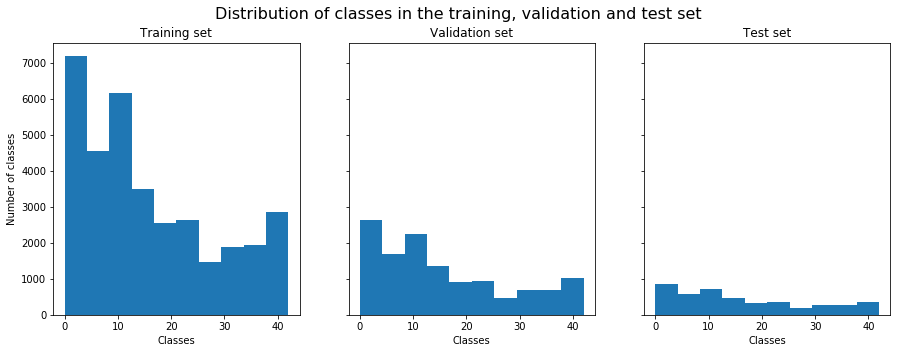

In [3]:
### Data exploration visualization code.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey = True)

axs[0].hist(y_train)
axs[0].set_ylabel('Number of classes')
axs[0].set_xlabel('Classes')
axs[0].set_title('Training set')

axs[1].hist(y_test)
axs[1].set_title('Validation set')
axs[1].set_xlabel('Classes')

axs[2].hist(y_valid)
axs[2].set_title('Test set')
axs[2].set_xlabel('Classes')

fig.suptitle('Distribution of classes in the training, validation and test set', fontsize=16)
plt.savefig('./examples/visualization.jpg')

### Plot a random traffic sign image from the Training dataset

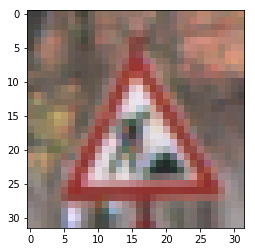

In [4]:
# Pick a random index from the dataset
import random

index = random.randint(0, len(X_train))
image = X_train[index]

plt.imshow(image)
plt.savefig('./examples/traffic_sign_example.jpg')

#### Verify that the label corresponds to the traffic sign

In [5]:
# The file signnames.csv contains id -> name mappings for each id.
# Read the CSV file and verify the label that corresponds to the index id.

from pandas import read_csv

filename = 'signnames.csv'
dataframe = read_csv(filename)

array = dataframe.values

labels = array[:,1]
traffic_sign = labels[y_train[index]]
print(traffic_sign)

Road work


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

#### Setup TensorFlow

In [7]:
import tensorflow as tf

#### Grayscaling function

In [8]:
def grayscale(images):
    return np.mean(images, axis = 3, keepdims=True)

#### Normalization function

In [9]:
def normalize(images):
    return (images - 128) / 128

#### Grayscale the training dataset

In [10]:
# Average grayscale from RGB. 
# https://stackoverflow.com/questions/26201839/average-grayscale-from-rgb-image-in-python

X_train_grayed = grayscale(X_train)
X_valid_grayed = grayscale(X_valid)
X_test_grayed = grayscale(X_test)

print(X_train_grayed.shape)

(34799, 32, 32, 1)


(32, 32, 1)


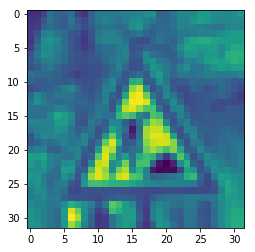

In [11]:
# Print a grayed image

grayed_image = X_train_grayed[index]
plt.imshow(grayed_image.squeeze())
print(grayed_image.shape)

#### Normalize the pixel values

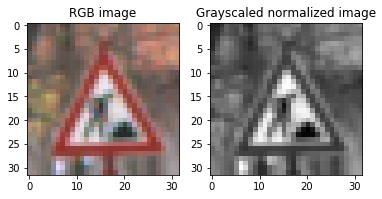

In [12]:
# Rescale images pixel values in the range 0-1

X_train_normalized = normalize(X_train_grayed)
X_valid_normalized = normalize(X_valid_grayed)
X_test_normalized = normalize(X_test_grayed)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey = False)

ax1.set_title('RGB image')
ax1.imshow(X_train[index])
ax2.set_title('Grayscaled normalized image')
ax2.imshow(X_train_normalized[index].squeeze(), cmap = 'gray')
plt.savefig('./examples/grayed_traffic_sign_example.jpg')

#### Experiments: Jittered dataset


As pointed out in an article by Pierre Sermant and Yann LeCun, the dataset provided by GTSRB presents a number of difficult challenges due to real-world variabilities such as viewpoint variations, phisical damage, color fading and low input resolution. 
I tried some of the techniques they suggested to address some of these challenges and built a jittered dataset by adding transformed versions of the original dataset.

##### See article http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf (III. Experiments, A.2)

#### Rotate the images

A transformed version of the training dataset is generated by rotating each image by a random angle between -15 and + 15 degrees. It is then added to the original one, thus making a dataset for training that is twice in size than before. 

<class 'numpy.ndarray'>
(34799, 32, 32, 1)
(69598, 32, 32, 1)


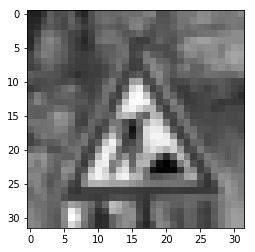

In [13]:
from scipy import ndimage
from random import seed
from random import randint

# Seed random number generator.
seed(1)

# Create an empty list.
X_train_rotated_list = []
# Create an empty Numpy array.
X_train_rotated = np.array([])

# Loop through the dataset
for normalized_image in X_train_normalized:
    # Generate some random angle between -15 and 15 degrees.
    angle = randint(-15, 15) 
    # Generate a rotated image.
    rotated_img = ndimage.rotate(normalized_image, angle, reshape=False)
    # Append to the list. 
    X_train_rotated_list.append(rotated_img)
    
# Stack the list of arrays into the empty numpy array.
# Stack arrays in sequence vertically (row wise).
X_train_rotated = np.stack(X_train_rotated_list, axis = 0)

# Print informations about the new dataset.  
print(type(X_train_rotated))
print(X_train_rotated.shape)

# Concatenate the new array into the original dataset to expand it. 
X_train_normalized = np.concatenate([X_train_normalized, X_train_rotated])
# Update the labels array accordingly.
y_train = np.concatenate([y_train, y_train])

# Print the dimensions of the new dataset.  
print(X_train_normalized.shape)

# Plot an image.
plt.imshow(X_train_rotated[index].squeeze(), cmap = 'gray')
# Save the image
plt.savefig('./examples/rotated_traffic_sign_example.jpg')

#### Translate the images

Another transformed version of the training dataset is generated by shifting each image by [-2, +2] pixels and it is then added to the original one. 
The resulting training dataset now yields 139196 samples. 

<class 'numpy.ndarray'>
(69598, 32, 32, 1)
(139196, 32, 32, 1)


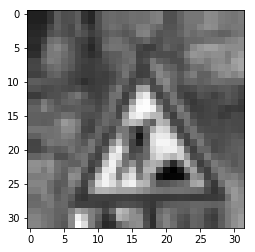

In [14]:
# Seed random number generator.
seed(1)

# Create an empty list.
X_train_translated_list = []
# Create an empty Numpy array.
X_train_translated = np.array([])

# Loop through the dataset
for normalized_image in X_train_normalized:
    # Generate some random pixel value between -2 and 2.
    pixels = randint(-2, 2) 
    # Generate a translated image.
    shifted_img = ndimage.shift(normalized_image, (pixels, pixels, 0), mode='nearest')
    # Append to the list. 
    X_train_translated_list.append(shifted_img)
    
# Stack the list of arrays into the empty numpy array.
# Stack arrays in sequence vertically (row wise).
X_train_translated = np.stack(X_train_translated_list, axis = 0)

# Print informations about the new dataset.  
print(type(X_train_translated))
print(X_train_translated.shape)

# Concatenate the new array into the original dataset to expand it. 
X_train_normalized = np.concatenate([X_train_normalized, X_train_translated])
# Update the labels array accordingly.
y_train = np.concatenate([y_train, y_train])

# Print the dimensions of the new dataset.  
print(X_train_normalized.shape)

# Plot an image.
plt.imshow(X_train_translated[index].squeeze(), cmap = 'gray')
# Save the image
plt.savefig('./examples/translated_traffic_sign_example.jpg')

### Shuffle the training data

In [15]:
# Avoid a warning issue due to an old version
# See issue >> https://github.com/scikit-learn/scikit-learn/issues/12551
from sklearn.utils import shuffle

import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FutureWarning)
    X_train_normalized, y_train = shuffle(X_train_normalized, y_train)

/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


### Model Architecture

In [16]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

EPOCHS = 20
BATCH_SIZE = 128

### Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. German Traffic Sign Dataset images are in color, so C is 3 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** ReLU.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** ReLU.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** ReLU.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** ReLU.

**Layer 5: Fully Connected (Logits).** This should have 43 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [17]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2, name='relu')

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits, conv1, conv2

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [18]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

### Features and Labels
Train LeNet to classify the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

#### Feeding data into the Neural Network 

When we need to feed data into a Neural Network, ideally we would feed all inputs together, compute the error and update the parameters (Gradient Descent). 
In real-world problems, though, we have thousands and millions of inputs, which make gradient descent computationally expensive. That's why we split the input set into several shorter pieces (called mini-batch) of size chosen by ourselves (here we chose a BATCH_SIZE = 128).
We generally use placeholders for inputs so that we can build the graph without any value in context, but just with a proper size for the input. 

https://www.easy-tensorflow.com/tf-tutorials/basics/tensor-types#Creating-a-Neural-Network

In [19]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

Defining the placeholder shape as [None, 32, 32, 32] means that we can feed any number of images of size (32, 32, 1) to the network. 

### Training Pipeline
Create a training pipeline that uses the model to classify the German Traffic Sign data.

In [20]:
rate = 0.001

logits, conv1, conv2 = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [21]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [22]:
from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_normalized)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_normalized, y_train = shuffle(X_train_normalized, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_normalized[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid_normalized, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.858

EPOCH 2 ...
Validation Accuracy = 0.888

EPOCH 3 ...
Validation Accuracy = 0.901

EPOCH 4 ...
Validation Accuracy = 0.903

EPOCH 5 ...
Validation Accuracy = 0.925

EPOCH 6 ...
Validation Accuracy = 0.920

EPOCH 7 ...
Validation Accuracy = 0.913

EPOCH 8 ...
Validation Accuracy = 0.917

EPOCH 9 ...
Validation Accuracy = 0.930

EPOCH 10 ...
Validation Accuracy = 0.922

EPOCH 11 ...
Validation Accuracy = 0.927

EPOCH 12 ...
Validation Accuracy = 0.935

EPOCH 13 ...
Validation Accuracy = 0.938

EPOCH 14 ...
Validation Accuracy = 0.934

EPOCH 15 ...
Validation Accuracy = 0.938

EPOCH 16 ...
Validation Accuracy = 0.938

EPOCH 17 ...
Validation Accuracy = 0.935

EPOCH 18 ...
Validation Accuracy = 0.935

EPOCH 19 ...
Validation Accuracy = 0.939

EPOCH 20 ...
Validation Accuracy = 0.939

Model saved


### Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

In [23]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_normalized, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.919


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [24]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob
from PIL import Image

# https://stackoverflow.com/questions/51178166/iterate-through-folder-with-pillow-image-open
german_traffic_images = glob.glob('./german_traffic_signs/*.jpg')

# Create a 4D Numpy array from images
# https://stackoverflow.com/questions/50195967/how-can-i-create-a-4d-numpy-array-from-images

# Create an empty list
traffic_sign_list = []
# Create an empty Numpy array
traffic_sign_test = np.array([])

for traffic_sign in german_traffic_images:
    with open(traffic_sign, 'rb') as file:
        # Load and resize the images
        sign_img = Image.open(file).resize((32, 32))
        # Convert the image to a Numpy array
        sign_img_data = np.asarray(sign_img)
        traffic_sign_list.append(sign_img_data)
traffic_sign_test = np.stack(traffic_sign_list, axis = 0)

print(type(traffic_sign_test))
print(traffic_sign_test.shape)

<class 'numpy.ndarray'>
(10, 32, 32, 3)


In [25]:
# 1D array containing the class of the each downloaded image. 
y_traffic_signs = np.array([13, 33, 17, 21, 18, 4, 25, 40, 38, 28])
print(y_traffic_signs.shape)

(10,)


#### Plot the images

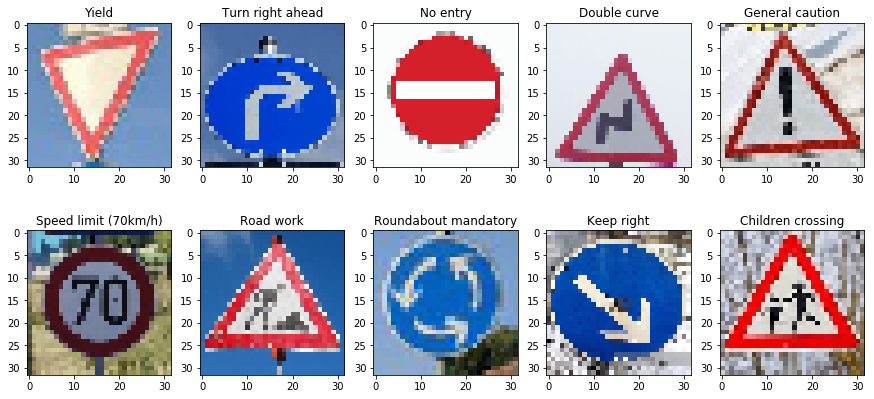

In [26]:
# Plot the 10 downloaded images in 2 rows and 5 columns
fig, sub_axs = plt.subplots(2, 5, figsize = (15, 7))

# Counter for the sign position in the traffic_sign_test tensor
sign_number = 0

# Loop over the rows and columns
for i in range(2):
    for j in range(5):
        sub_axs[i][j].imshow(traffic_sign_test[sign_number])
        traffic_sign_label = labels[y_traffic_signs[sign_number]]
        sub_axs[i][j].set_title(traffic_sign_label)
        sign_number = sign_number + 1
        
plt.savefig('./german_traffic_signs_resized/signs.jpg')

### Predict the Sign Type for Each Image

In [27]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

#### Preprocess the images

In [28]:
# Transform the RGB images to grayscale. 
traffic_signs_grayscaled = grayscale(traffic_sign_test)
print(traffic_signs_grayscaled.dtype)
# Convert the Tensor data type to float32.
traffic_signs_grayscaled = np.float32(traffic_signs_grayscaled)
print(traffic_signs_grayscaled.dtype)
# Normalize the grayscale images. 
X_traffic_signs_normalized = normalize(traffic_signs_grayscaled)

float64
float32


#### Output the predictions for each signal

In [29]:
# Define the Softmax probability distribution.
softmax_probabilities = tf.nn.softmax(logits)

# Restore the previous session and run the predictions. 
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    # Use the model to compute the probabilities for each image. 
    traffic_signs_probabilities = sess.run(softmax_probabilities, feed_dict = {x: X_traffic_signs_normalized})
    # Compute the predictions for the list of images. 
    traffic_signs_predictions = sess.run(tf.argmax(traffic_signs_probabilities, axis = 1))
    
    # Iterate through the predictions for the list of new test images.
    for i, sign_prediction in enumerate(traffic_signs_predictions):
        # Associate a prediction to the image label for comparison. 
        sign_label_predicted = labels[sign_prediction]
        sign_label_real_value = labels[y_traffic_signs[i]]
        if (sign_label_predicted != sign_label_real_value):
            print("Wrong prediction of `{prediction}` (id = {sign_prediction_id}) for traffic sign `{label}` (id = {y_traffic_sign_id})".format(
                label = sign_label_real_value, 
                prediction = sign_label_predicted,
                sign_prediction_id = sign_prediction,
                y_traffic_sign_id = y_traffic_signs[i]
            ))
        else:
            print("Traffic sign `{label}` was correctly predicted as `{prediction}`".format(label = sign_label_real_value, prediction = sign_label_predicted))

INFO:tensorflow:Restoring parameters from ./lenet
Traffic sign `Yield` was correctly predicted as `Yield`
Traffic sign `Turn right ahead` was correctly predicted as `Turn right ahead`
Traffic sign `No entry` was correctly predicted as `No entry`
Wrong prediction of `Children crossing` (id = 28) for traffic sign `Double curve` (id = 21)
Traffic sign `General caution` was correctly predicted as `General caution`
Traffic sign `Speed limit (70km/h)` was correctly predicted as `Speed limit (70km/h)`
Wrong prediction of `Bicycles crossing` (id = 29) for traffic sign `Road work` (id = 25)
Traffic sign `Roundabout mandatory` was correctly predicted as `Roundabout mandatory`
Wrong prediction of `Speed limit (50km/h)` (id = 2) for traffic sign `Keep right` (id = 38)
Traffic sign `Children crossing` was correctly predicted as `Children crossing`


### Analyze Performance

In [30]:
### Calculate the accuracy for these 10 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_traffic_signs_normalized, y_traffic_signs)
    print("External images Test Accuracy = {:.0%}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
External images Test Accuracy = 70%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [31]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    top_probabilities = sess.run(tf.nn.top_k(traffic_signs_probabilities, k=5))
    print(top_probabilities)

TopKV2(values=array([[  1.00000000e+00,   3.48907821e-15,   6.71324697e-16,
          3.70567660e-19,   6.95869697e-20],
       [  1.00000000e+00,   6.57638055e-10,   4.36300857e-11,
          7.94714468e-12,   4.47960842e-13],
       [  1.00000000e+00,   8.46572101e-21,   3.04871498e-36,
          0.00000000e+00,   0.00000000e+00],
       [  9.60896790e-01,   2.39218846e-02,   7.28539610e-03,
          3.15502938e-03,   2.51078303e-03],
       [  9.99897361e-01,   8.95483608e-05,   1.27988051e-05,
          3.59283888e-07,   1.81619150e-10],
       [  1.00000000e+00,   5.49106496e-13,   9.78949365e-25,
          6.88317279e-25,   1.03189063e-27],
       [  9.96993780e-01,   3.00624594e-03,   6.17490770e-09,
          3.37588624e-09,   1.56485058e-09],
       [  1.00000000e+00,   1.27032196e-09,   1.39844941e-10,
          3.99462165e-11,   1.47461834e-11],
       [  9.99999881e-01,   1.47417978e-07,   9.15915677e-11,
          4.87267573e-18,   2.07875929e-19],
       [  9.99999881e-0

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [32]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

# Image to test. Chose the fourth image downloaded from the web, that was wrongly classified.
test_image_misclassified = X_traffic_signs_normalized[3]
# Add a dimension to the array, to provide a 4D tensor that is required as input to the function. 
test_image_misclassified_input = np.expand_dims(test_image_misclassified, 0)
print(test_image_misclassified.shape)
print(test_image_misclassified_input.shape)

# Get the image that the classifier gave as result in place of the right one. 
wrong_test_image = X_traffic_signs_normalized[9]
wrong_test_image_input = np.expand_dims(wrong_test_image, 0)


def outputFeatureMap(image_input, label, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    #
    #image_input = normalize(grayscale(image_input))
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    # Add a title to the figures. 
    # See https://stackoverflow.com/questions/55767312/how-to-position-suptitle
    plt.suptitle(str(label), size = 18, y = 0.92, color='b')
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

(32, 32, 1)
(1, 32, 32, 1)


INFO:tensorflow:Restoring parameters from ./lenet


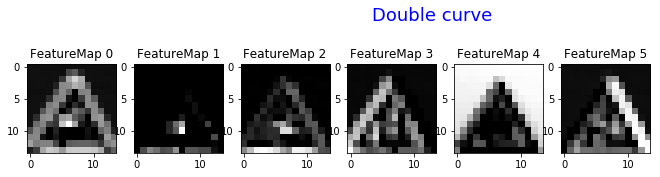

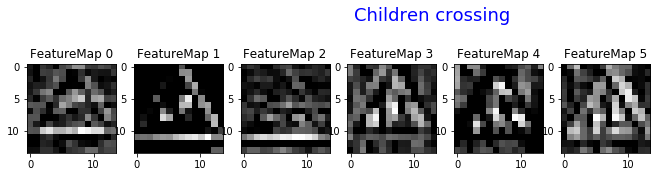

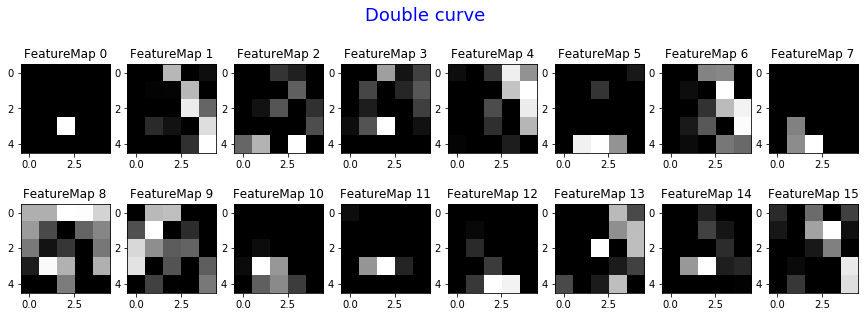

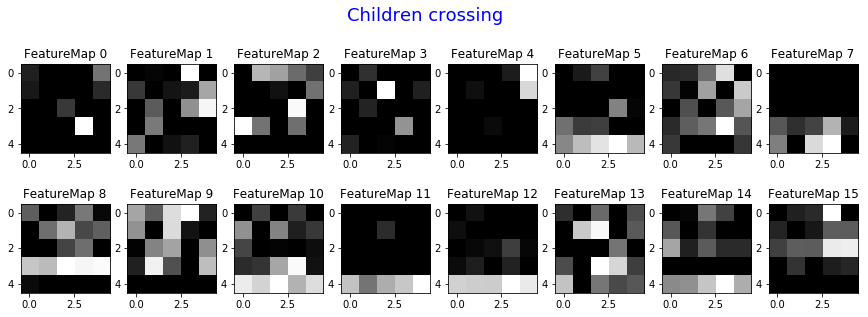

In [33]:
# Run the "outputFeatureMap" function 
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    # Pass the two images to the function to plot the feature maps after the first and second Pooling layer. 
    outputFeatureMap(test_image_misclassified_input, labels[y_traffic_signs[3]], conv1)
    outputFeatureMap(wrong_test_image_input, labels[y_traffic_signs[9]], conv1, plt_num=2)
    outputFeatureMap(test_image_misclassified_input, labels[y_traffic_signs[3]], conv2, plt_num=3)
    outputFeatureMap(wrong_test_image_input, labels[y_traffic_signs[9]], conv2, plt_num=4)